In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
import torchvision.models as models
import torchvision.transforms as T

## Loading data

In [2]:
train_transforms = T.Compose([
    T.Resize((32, 32)),
    T.RandomHorizontalFlip(),
    #T.RandomRotation(20),
    T.ToTensor()
])

test_transforms = T.Compose([
    T.Resize((32, 32)),
    T.ToTensor(),
])

In [3]:
train_dataset = MNIST('./data', train=True, transform=train_transforms)

test_dataset = MNIST('.data', train=False, transform=test_transforms)

In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=512, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512, shuffle=False)

## Define a neural network

In [5]:
class LeNet(nn.Module):

    def __init__(self, num_classes=10):
        super(LeNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 16 * 5 * 5)
        x = self.classifier(x)
        return x

In [6]:
model = LeNet()

## Train a Neural Net

In [7]:
num_epochs = 10

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [8]:
for epoch in range(num_epochs):

    print("Epoch #{}:".format(epoch))
    
    running_loss = 0
    total = 0
    correct = 0
    
    model.train()
    
    for images, labels in train_loader:

        optimizer.zero_grad()
        outputs = model(images)
        
        _, predicted = torch.max(outputs, 1)
        
        loss = loss_function(outputs, labels)
        running_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print("TL: {:.4f} TA: {:.2f}%".format(running_loss / total,
                                         correct * 100 / total))
    
    model.eval()
    
    running_loss = 0
    total = 0
    correct = 0
    
    with torch.no_grad():
    
        for images, labels in test_loader:
        
            outputs = model(images)
        
            _, predicted = torch.max(outputs, 1)

            loss = loss_function(outputs, labels)
            running_loss += loss.item()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        print("VL: {:.4f} VA: {:.2f}%".format(running_loss / total,
                                     correct * 100 / total))
        
        

Epoch #0:
TL: 0.0045 TA: 13.57%
VL: 0.0045 VA: 30.11%
Epoch #1:
TL: 0.0037 TA: 37.03%
VL: 0.0018 VA: 71.96%
Epoch #2:
TL: 0.0019 TA: 66.98%
VL: 0.0011 VA: 81.29%
Epoch #3:
TL: 0.0014 TA: 75.47%
VL: 0.0009 VA: 85.61%
Epoch #4:
TL: 0.0012 TA: 79.31%
VL: 0.0007 VA: 88.61%
Epoch #5:
TL: 0.0011 TA: 81.91%
VL: 0.0006 VA: 90.88%
Epoch #6:
TL: 0.0010 TA: 83.80%
VL: 0.0005 VA: 91.54%
Epoch #7:
TL: 0.0009 TA: 85.24%
VL: 0.0005 VA: 92.83%
Epoch #8:
TL: 0.0009 TA: 86.14%
VL: 0.0004 VA: 93.40%
Epoch #9:
TL: 0.0008 TA: 86.95%
VL: 0.0004 VA: 93.66%


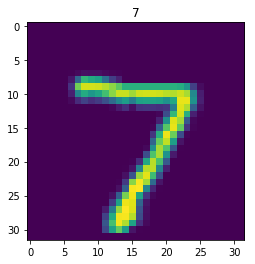

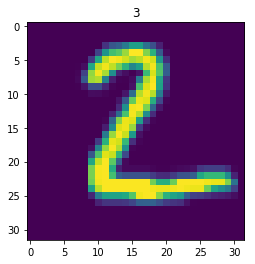

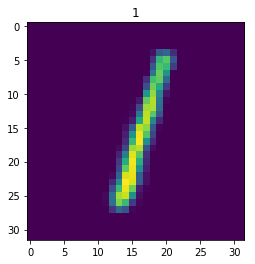

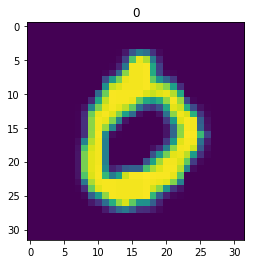

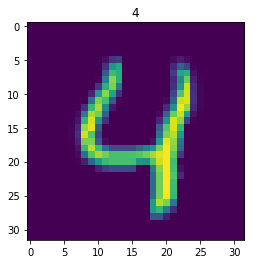

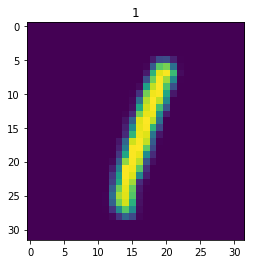

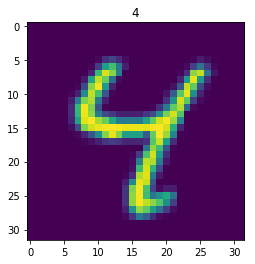

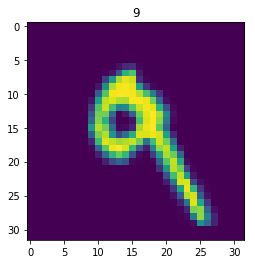

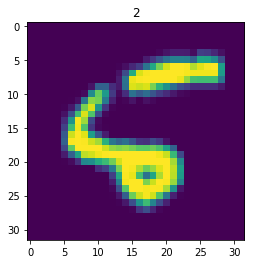

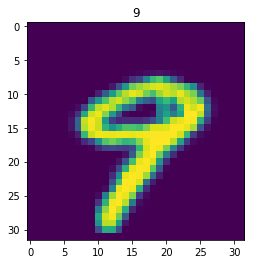

In [46]:
random_examples = next(iter(test_loader))[0][:10]
outputs = model(random_examples)
_, predicted = torch.max(outputs, 1)

for example, prediction in zip(random_examples, predicted):
    
    plt.title(str(prediction.numpy()))
    plt.imshow(example[0])
    plt.show()